- illustrates the use of netcdf and xarray 
- uses matplotlib with cartopy to plot the field
- uses ibtracs data to also plot location of each storm



In [1]:
#import netCDF4
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

from cartopy import config
import cartopy.crs as ccrs

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


import geocat.datafiles as gdf
import geocat.viz.util as gvutil


from datetime import date
import pandas as pd
#import os

In [2]:
# edit this to change the geographic area 

min_lon = -180.
max_lon =  180.
min_lat = -35.
max_lat =  45.
cenLon  = .5*(min_lon + max_lon )

# provide starting date in YYYYMMDDHH format
startDate = 2005082600

# number of images to plot: Each image will be incremented by dt
ntimes = 10
dt = .25  # in units of days 0.25 = 6 hours



In [3]:
# gridsat directory
gridSatDirectory = '/run/media/anant/spareB/gridsat/'

# ibtracs file
ibtracsfile = '/home/anant/data100/data/ibtracs/IBTrACS.since1980.v04r00.nc'

try:
    ds = xr.open_dataset(ibtracsfile)
except:
    print ("ibtracs file not found. quitting code")
    quit()
    
print ("Ibtracs file found and opened")


# load the array containing all time stamps of the global hurricane tracks
#time  = ds.time
times = ds.time.values.astype('datetime64[h]')

print(ds.wmo_wind)

Ibtracs file found and opened
<xarray.DataArray 'wmo_wind' (storm: 4491, date_time: 360)>
[1616760 values with dtype=float32]
Coordinates:
    time     (storm, date_time) datetime64[ns] 1980-01-01T00:00:00.000040448 ...
    lat      (storm, date_time) float32 ...
    lon      (storm, date_time) float32 ...
Dimensions without coordinates: storm, date_time
Attributes:
    long_name:              Maximum sustained wind speed from Official WMO ag...
    units:                  kts
    coverage_content_type:  physicalMeasurement


# illustration of how to extract the hurricane position from ibtracs at any given time

In [4]:
dateStart = pd.to_datetime(startDate, format='%Y%m%d%H')
dateWant  = pd.Timestamp.to_datetime64(dateStart).astype('datetime64[h]')

#-------------------------------------------------------------------------------------
# This locates all tropical cyclones for the given time. 
# we will use these lines in the plotting section where we will draw markers at the
# location of each storm


# for a given date, we see how many storms in the ibtracs are reported
indsx, indsy = np.where(times == dateWant)
print ('Number of storms for this date found = ' , len(indsx))

# Loop over each storm and report its location and wind speed
# We only care about tropical cyclones. The general definition is that the winds must exceed 33 knots
# for a system to be classified as a tropical cyclone

for x,y in zip(indsx,indsy):  
    windStorm =  ds.wmo_wind[x,y].values

    if (windStorm > 33.0):    
        timeStorm =  ds.time[x,y].values.astype('datetime64[h]')
        latStorm  =  ds.lat[x,y].values
        lonStorm  =  ds.lon[x,y].values   
        print(timeStorm, 'Lat = ', latStorm, ' Lon = ', lonStorm, ' Wind speed = ', windStorm)


Number of storms for this date found =  6
2005-08-26T00 Lat =  36.025001525878906  Lon =  141.0  Wind speed =  50.0
2005-08-26T00 Lat =  25.899999618530273  Lon =  -80.30000305175781  Wind speed =  70.0
2005-08-26T00 Lat =  17.200000762939453  Lon =  -106.80001068115234  Wind speed =  35.0


# On to the plotting part


2005-08-26T00 Lat =  36.025001525878906  Lon =  141.0  Wind speed =  50.0
2005-08-26T00 Lat =  25.899999618530273  Lon =  -80.30000305175781  Wind speed =  70.0
2005-08-26T00 Lat =  17.200000762939453  Lon =  -106.80001068115234  Wind speed =  35.0


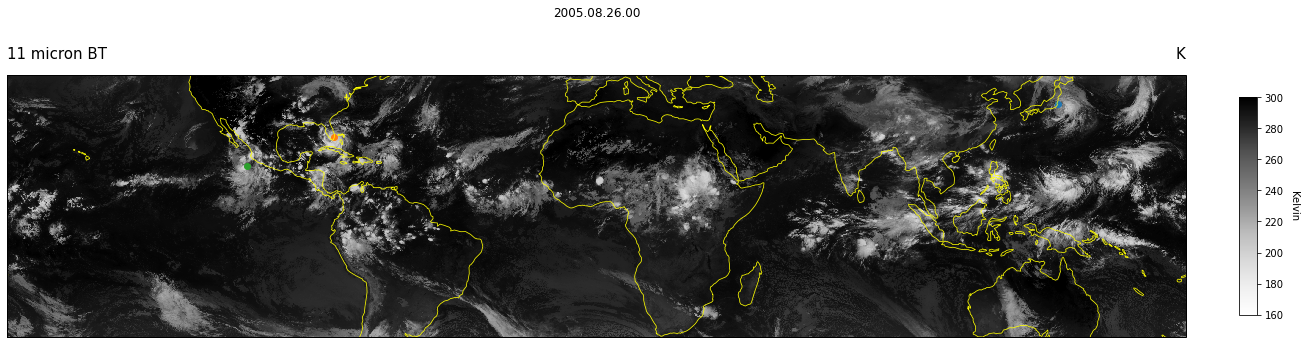

2005-08-26T06 Lat =  36.69999694824219  Lon =  142.72500610351562  Wind speed =  45.0
2005-08-26T06 Lat =  25.399999618530273  Lon =  -81.30000305175781  Wind speed =  65.0
2005-08-26T06 Lat =  17.5  Lon =  -107.70000457763672  Wind speed =  40.0


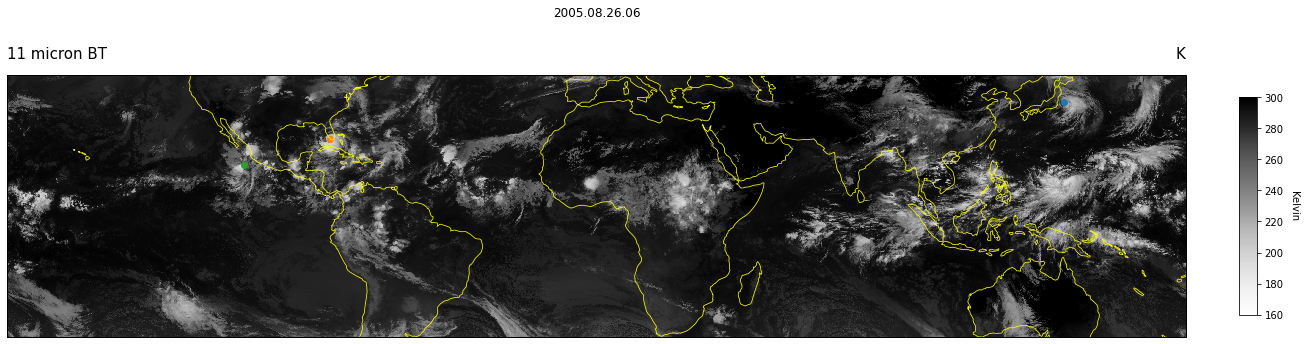

2005-08-26T12 Lat =  37.150001525878906  Lon =  144.64999389648438  Wind speed =  45.0
2005-08-26T12 Lat =  25.100000381469727  Lon =  -82.0  Wind speed =  75.0
2005-08-26T12 Lat =  17.700000762939453  Lon =  -108.70000457763672  Wind speed =  45.0


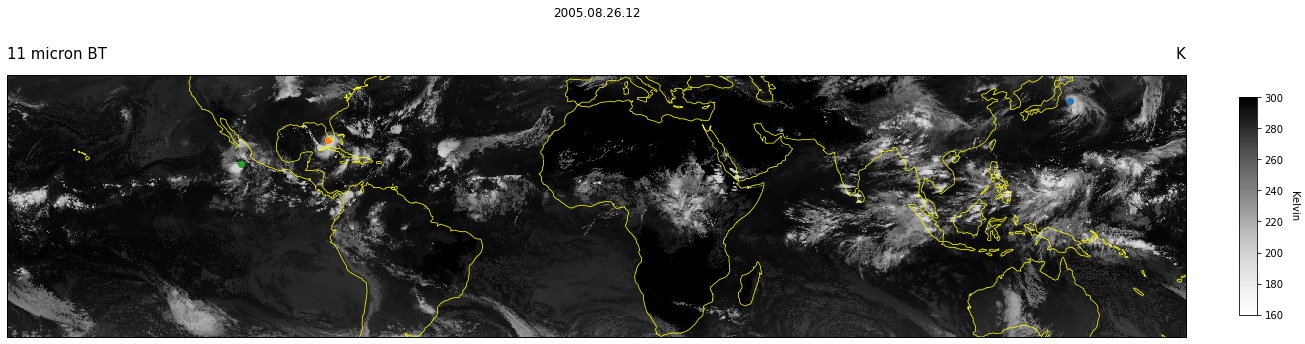

2005-08-26T18 Lat =  37.4428596496582  Lon =  146.35714721679688  Wind speed =  40.0
2005-08-26T18 Lat =  24.899999618530273  Lon =  -82.5999984741211  Wind speed =  85.0
2005-08-26T18 Lat =  17.5  Lon =  -109.60000610351562  Wind speed =  45.0


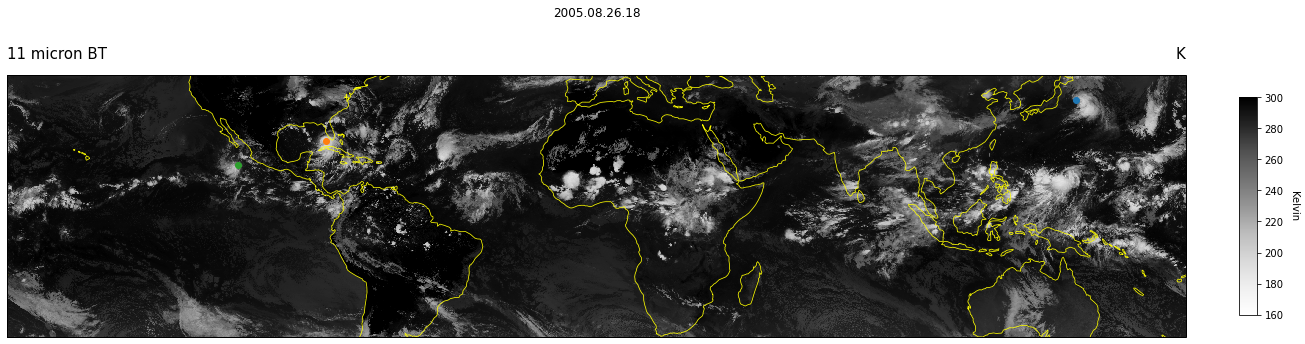

2005-08-27T00 Lat =  37.369998931884766  Lon =  148.0  Wind speed =  40.0
2005-08-27T00 Lat =  24.600000381469727  Lon =  -83.30000305175781  Wind speed =  90.0
2005-08-27T00 Lat =  14.375  Lon =  142.25  Wind speed =  35.0
2005-08-27T00 Lat =  17.399999618530273  Lon =  -110.50000762939453  Wind speed =  40.0


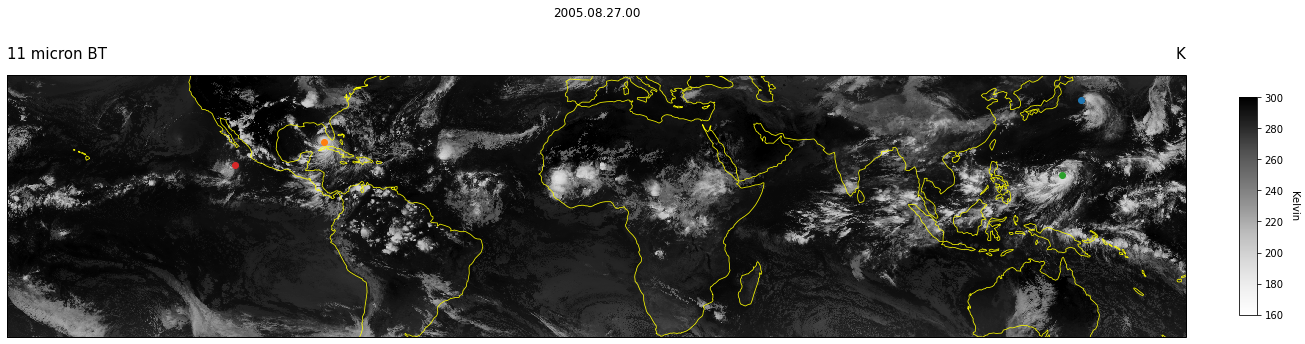

2005-08-27T06 Lat =  37.29999923706055  Lon =  149.3000030517578  Wind speed =  40.0
2005-08-27T06 Lat =  24.399999618530273  Lon =  -84.0  Wind speed =  95.0
2005-08-27T06 Lat =  15.674999237060547  Lon =  141.6750030517578  Wind speed =  35.0
2005-08-27T06 Lat =  17.399999618530273  Lon =  -111.30001068115234  Wind speed =  40.0


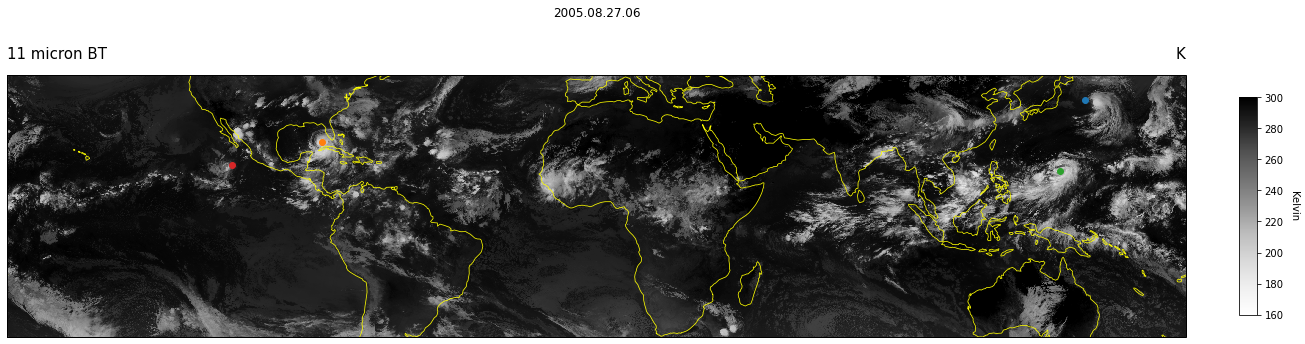

2005-08-27T12 Lat =  36.599998474121094  Lon =  150.8000030517578  Wind speed =  40.0
2005-08-27T12 Lat =  24.400001525878906  Lon =  -84.69999694824219  Wind speed =  100.0
2005-08-27T12 Lat =  16.69999885559082  Lon =  141.15000915527344  Wind speed =  40.0
2005-08-27T12 Lat =  17.399999618530273  Lon =  -112.20000457763672  Wind speed =  35.0


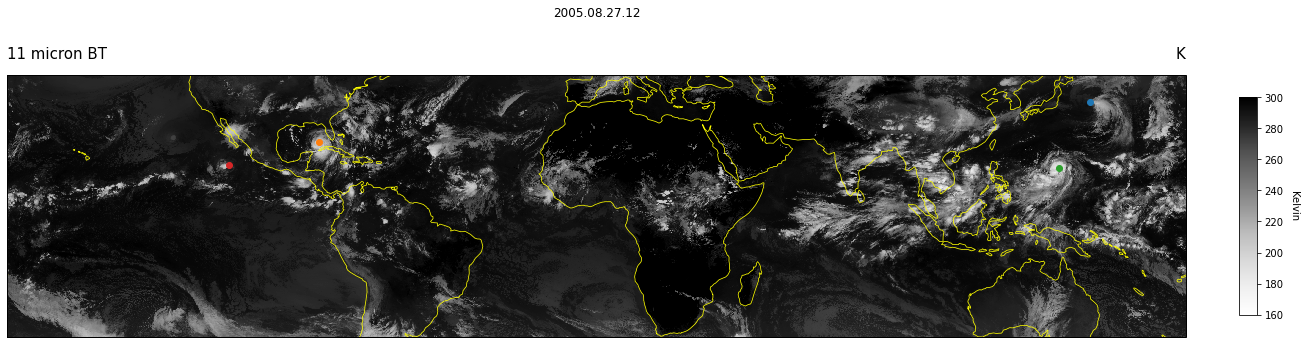

2005-08-27T18 Lat =  36.29999923706055  Lon =  151.8000030517578  Wind speed =  40.0
2005-08-27T18 Lat =  24.5  Lon =  -85.30000305175781  Wind speed =  100.0
2005-08-27T18 Lat =  17.475000381469727  Lon =  139.84999084472656  Wind speed =  45.0
2005-08-27T18 Lat =  17.299999237060547  Lon =  -113.10000610351562  Wind speed =  35.0


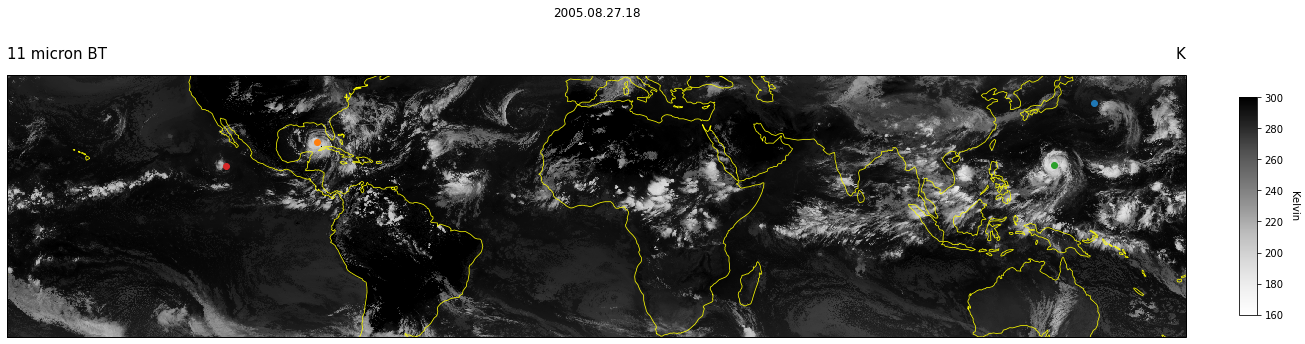

2005-08-28T00 Lat =  24.799999237060547  Lon =  -85.9000015258789  Wind speed =  100.0
2005-08-28T00 Lat =  18.32499885559082  Lon =  138.77499389648438  Wind speed =  50.0


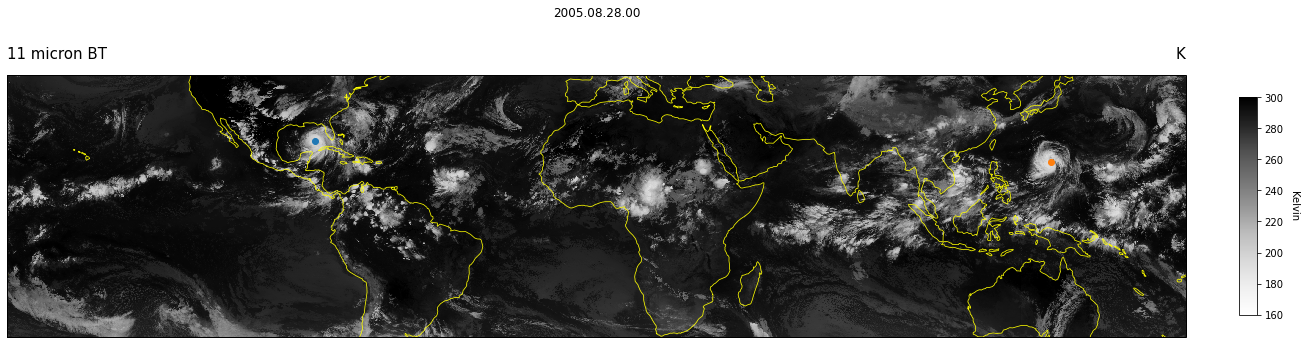

2005-08-28T06 Lat =  25.200000762939453  Lon =  -86.69999694824219  Wind speed =  125.0
2005-08-28T06 Lat =  19.325000762939453  Lon =  137.77499389648438  Wind speed =  65.0


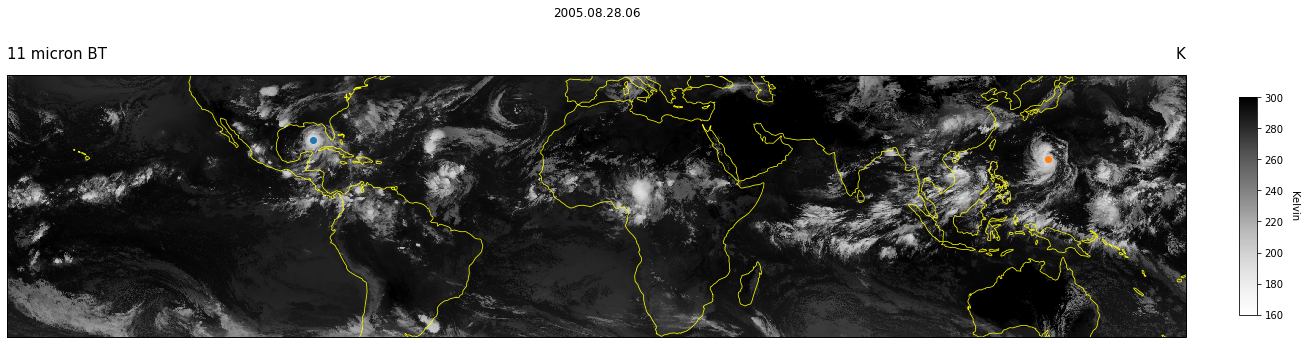

In [5]:
# set the min and max values to shade in the IR brightness temperature field
Cmin=  160
Cmax = 300


for i in range(0, ntimes):
    # hard coded 12-hr increment.
    #dateStart = dateStart + pd.Timedelta("12 hours")
    
    #user defined dt
    datePlot = dateStart + pd.Timedelta(days=i*dt)
    
    dateString = datePlot.strftime('%Y.%m.%d.%H')
                                           
    file_name = gridSatDirectory+ "GRIDSAT-B1."  +  dateString + ".v02r01.nc"
    df = xr.open_dataset(file_name)

    irwin = df.irwin_cdr[0,:,:]

    mask_lon = (irwin.lon >= min_lon) & (irwin.lon <= max_lon)
    mask_lat = (irwin.lat >= min_lat) & (irwin.lat <= max_lat)
    irwin = irwin.where(mask_lon & mask_lat, drop=True)
    
    lats = irwin['lat'][:]
    lons = irwin['lon'][:]
    
 
    fig = plt.figure(figsize=(24,8))

    # Generate axes, using Cartopy, drawing coastlines, and adding features
    projection = ccrs.PlateCarree(central_longitude=cenLon)
    ax = plt.axes(projection=projection)
    ax.coastlines(linewidths=0.75, color='yellow')

    # drop the last row and column to be compatible with shading=flat. see documentation for pcolormesh
    ct = plt.pcolormesh(lons, lats, irwin[:-1,:-1],cmap='Greys', rasterized=True, vmin=Cmin, vmax =Cmax, shading='flat')
    #ct = plt.imshow(irwin[:-1,:-1], cmap='Greys', origin='lower', extent=[min_lon, max_lon,min_lat, max_lat])
    

    # create a colorbar
    cbar = plt.colorbar(ct, fraction=.08, pad=0.04, shrink=0.5, aspect=12)
    cbar.set_label('Kelvin', labelpad=15, y=.5, rotation=270)
 



    # Use geocat.viz.util convenience function to add major tick lines
    gvutil.add_major_minor_ticks(ax, y_minor_per_major=1, labelsize=12)

    # Use geocat.viz.util convenience function to add lat and lon tick labels
    gvutil.add_lat_lon_ticklabels(ax)

    # Remove degree symbol from tick label
    ax.yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))
    ax.xaxis.set_major_formatter(LongitudeFormatter(degree_symbol=''))
    # Use geocat.viz.util convenience function to set titles and labels


    gvutil.set_titles_and_labels(ax,
                                 righttitle="K",
                                 righttitlefontsize=15,
                                 lefttitle="11 micron BT",
                                 lefttitlefontsize=15,
                                 xlabel="",
                                 ylabel="")



# now locate all storms and mark them on the map
# if a given storm is outside the ploting area of the map, it will still put a marker on the plot
# you may want to eitehr extend the ploting area of the map (see lon_min, lat_min, lon_max, lat_max)
# or if you wish to ignore those locations, you can filter out the storms before plotting the markers

    dateWant = pd.Timestamp.to_datetime64(datePlot).astype('datetime64[h]')
    indsx, indsy = np.where(times == dateWant)
    for x,y in zip(indsx,indsy):
        windStorm =  ds.wmo_wind[x,y].values

        # mark only those storms that have sustained wind speeds > 33 kts
        # per wmo definition, these are tropical cyclones
        # change the threshold to filter for other categories of hurricanes - cat 1,2 ...
        if (windStorm > 33.0):    
            ax.scatter(ds.lon[x,y].values, ds.lat[x,y], transform=projection)
            
            # output the info of storms that are marked
            timeStorm =  ds.time[x,y].values.astype('datetime64[h]')
            latStorm  =  ds.lat[x,y].values
            lonStorm  =  ds.lon[x,y].values   
            print(timeStorm, 'Lat = ', latStorm, ' Lon = ', lonStorm, ' Wind speed = ', windStorm)

    
    
    plt.title(dateString, y=1.2)
    plt.show()

    

